In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [ ]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


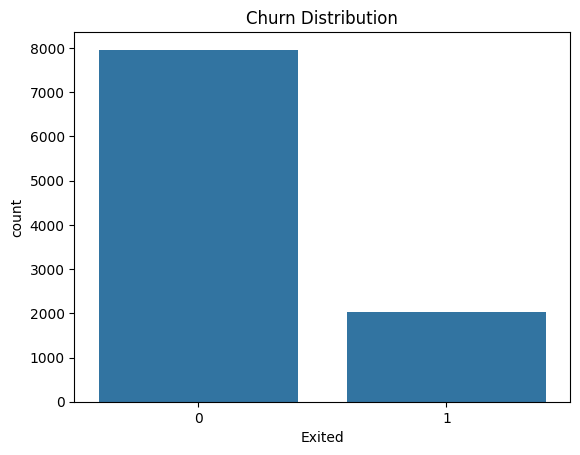

In [ ]:
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

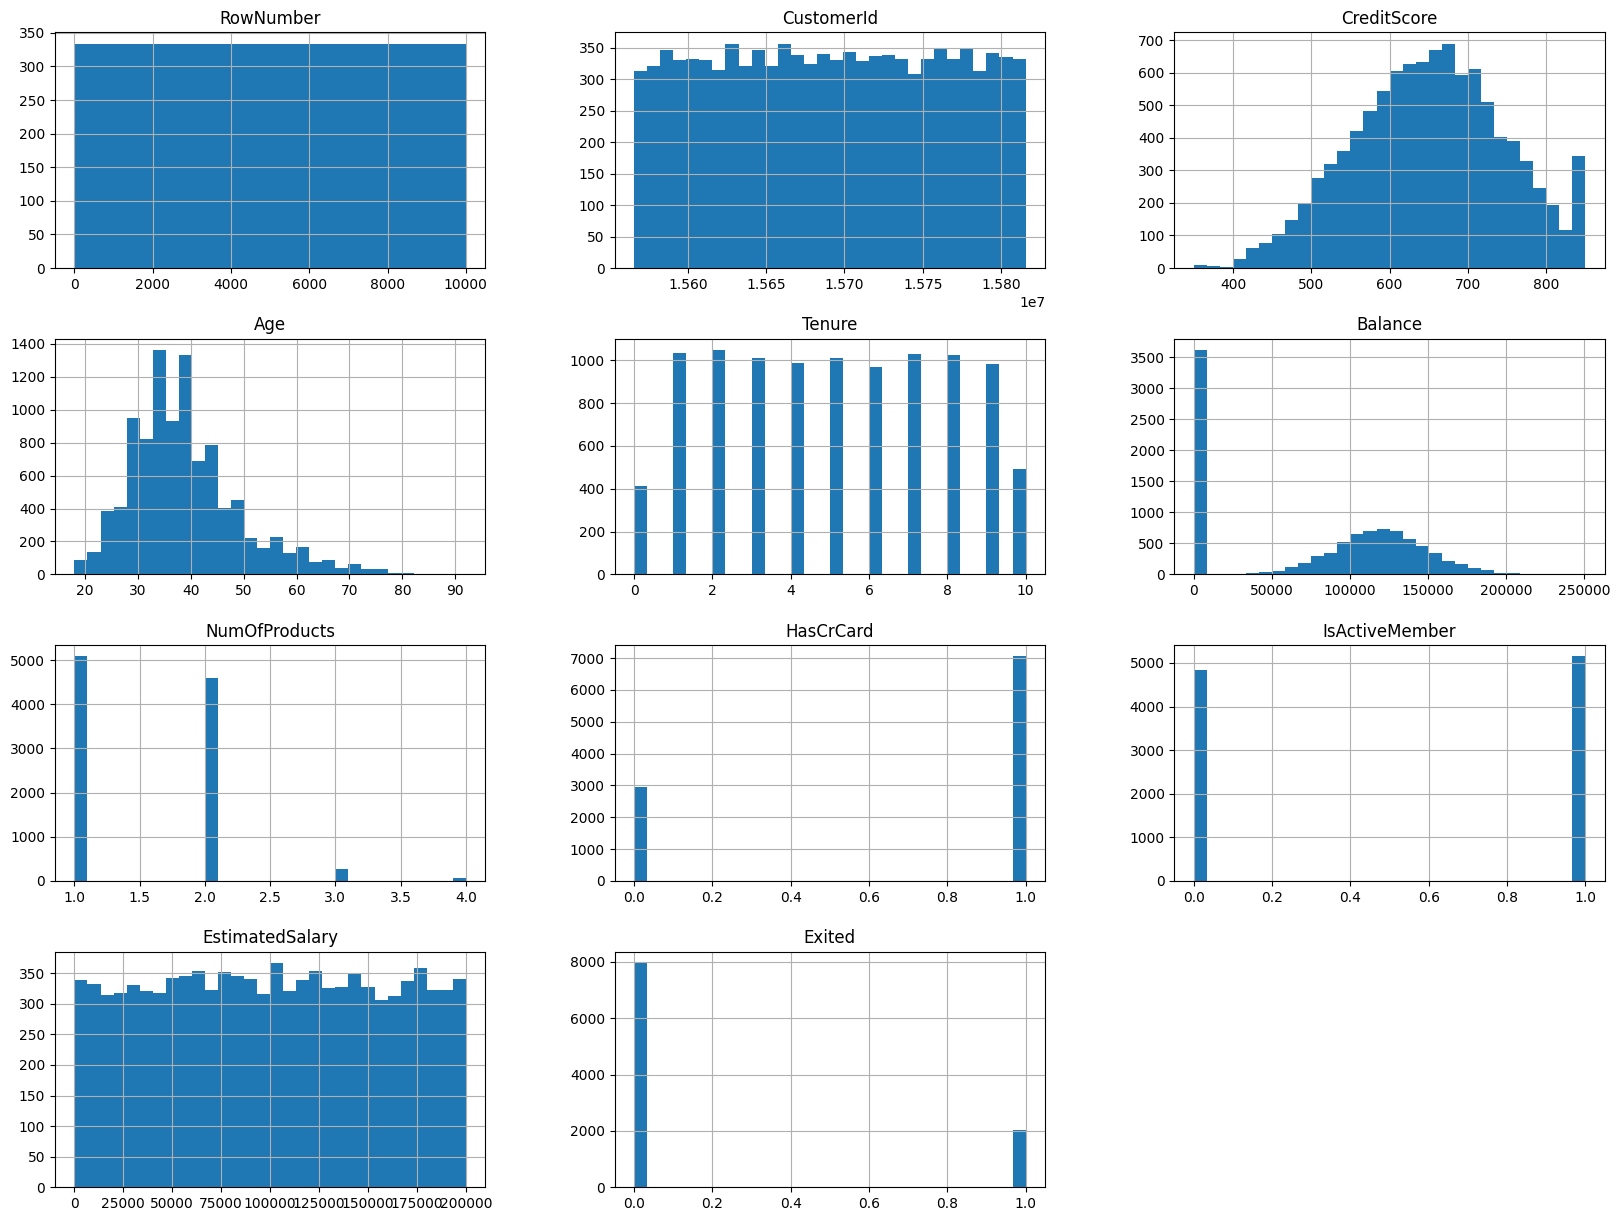

In [ ]:
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data = pd.get_dummies(data, drop_first=True)

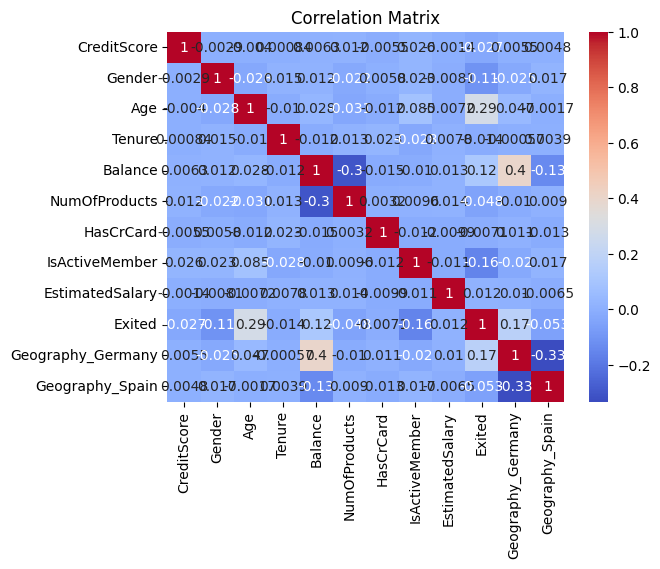

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    return accuracy, report, conf_matrix, fpr, tpr, roc_auc

In [ ]:
log_reg = LogisticRegression()
log_reg_accuracy, log_reg_report, log_reg_conf_matrix, log_reg_fpr, log_reg_tpr, log_reg_roc_auc = evaluate_model(log_reg, X_train, y_train, X_test, y_test)
print('Logistic Regression Accuracy:', log_reg_accuracy)
print('Logistic Regression Classification Report:\n', log_reg_report)
print('Logistic Regression Confusion Matrix:\n', log_reg_conf_matrix)

Logistic Regression Accuracy: 0.811
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Logistic Regression Confusion Matrix:
 [[1543   64]
 [ 314   79]]


In [ ]:
rf = RandomForestClassifier()
rf_accuracy, rf_report, rf_conf_matrix, rf_fpr, rf_tpr, rf_roc_auc = evaluate_model(rf, X_train, y_train, X_test, y_test)
print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest Classification Report:\n', rf_report)
print('Random Forest Confusion Matrix:\n', rf_conf_matrix)

Random Forest Accuracy: 0.8725
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.48      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Random Forest Confusion Matrix:
 [[1555   52]
 [ 203  190]]


In [ ]:
gb = GradientBoostingClassifier()
gb_accuracy, gb_report, gb_conf_matrix, gb_fpr, gb_tpr, gb_roc_auc = evaluate_model(gb, X_train, y_train, X_test, y_test)
print('Gradient Boosting Accuracy:', gb_accuracy)
print('Gradient Boosting Classification Report:\n', gb_report)
print('Gradient Boosting Confusion Matrix:\n', gb_conf_matrix)

Gradient Boosting Accuracy: 0.8675
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Gradient Boosting Confusion Matrix:
 [[1543   64]
 [ 201  192]]


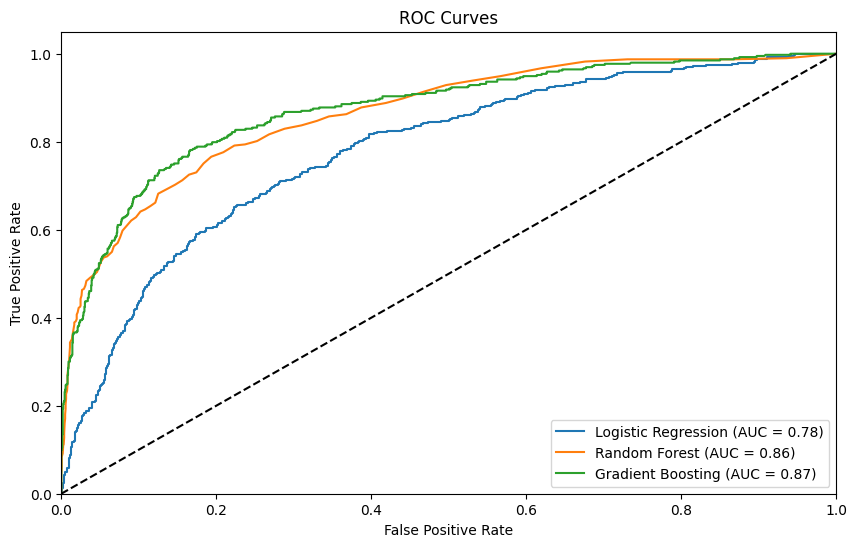

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()